In [1]:
##import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Data-Melbourne_F_fixed.csv')
df

Unnamed: 0  Average Outflow  Average Inflow  Energy Consumption  \
0              0            2.941           2.589              175856   
1              1            2.936           2.961              181624   
2              2            2.928           3.225              202016   
3              3            2.928           3.354              207547   
4              4            2.917           3.794              202824   
...          ...              ...             ...                 ...   
1377        1377            5.068           4.716              305938   
1378        1378            5.882           5.510              293446   
1379        1379            4.638           4.811              307968   
1380        1380            5.373           4.929              316675   
1381        1381            4.072           5.194              318268   

      Ammonia  Biological Oxygen Demand  Chemical Oxygen Demand  \
0        27.0                     365.0                   730.0   
1        25.0                     370.0                   740.0   
2        42.0                     418.0                   836.0   
3        36.0                     430.0                   850.0   
4        46.0                     508.0                  1016.0   
...       ...                       ...                     ...   
1377     28.0                     310.0                   660.0   
1378     40.0                     250.0                   700.0   
1379     47.0                     260.0                   860.0   
1380     46.0                     300.0                   900.0   
1381     31.0                     270.0                   910.0   

      Total Nitrogen  Average Temperature  Maximum temperature  \
0             60.378                 19.3                 25.1   
1             60.026                 17.1                 23.6   
2             64.522                 16.8                 27.2   
3             63.000                 14.6                 19.9   
4             65.590                 13.4                 19.1   
...              ...                  ...                  ...   
1377          58.807                  6.8                 10.0   
1378          60.671                  7.6                 16.0   
1379          64.000                  9.7                 16.0   
1380          62.479                 10.9                 17.0   
1381          63.312                 12.4                 16.0   

      Minimum temperature  Atmospheric pressure  Average humidity  \
0                    12.6                   0.0                56   
1                    12.3                   0.0                63   
2                     8.8                   0.0                47   
3                    11.1                   0.0                49   
4                     8.0                   0.0                65   
...                   ...                   ...               ...   
1377                  4.0                   0.0                56   
1378                  3.0                   0.0                71   
1379                  3.0                   0.0                65   
1380                  5.0                   0.0                65   
1381                 10.0                   0.0                63   

      Total rainfall  Average visibility  Average wind speed  \
0               1.52                10.0                26.9   
1               0.00                10.0                14.4   
2               0.25                10.0                31.9   
3               0.00                10.0                27.0   
4               0.00                10.0                20.6   
...              ...                 ...                 ...   
1377            0.00                10.0                14.4   
1378            0.00                 0.0                13.5   
1379            0.00                10.0                18.1   
1380            0.00                10.0                21.9  

In [3]:
df = df.drop(['Unnamed: 0'] , axis = 1)

In [5]:
df.isnull().sum()

Average Outflow             0
Average Inflow              0
Energy Consumption          0
Ammonia                     0
Biological Oxygen Demand    0
Chemical Oxygen Demand      0
Total Nitrogen              0
Average Temperature         0
Maximum temperature         0
Minimum temperature         0
Atmospheric pressure        0
Average humidity            0
Total rainfall              0
Average visibility          0
Average wind speed          0
Maximum wind speed          0
Year                        0
Month                       0
Day                         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Average Outflow           1382 non-null   float64
 1   Average Inflow            1382 non-null   float64
 2   Energy Consumption        1382 non-null   int64  
 3   Ammonia                   1382 non-null   float64
 4   Biological Oxygen Demand  1382 non-null   float64
 5   Chemical Oxygen Demand    1382 non-null   float64
 6   Total Nitrogen            1382 non-null   float64
 7   Average Temperature       1382 non-null   float64
 8   Maximum temperature       1382 non-null   float64
 9   Minimum temperature       1382 non-null   float64
 10  Atmospheric pressure      1382 non-null   float64
 11  Average humidity          1382 non-null   int64  
 12  Total rainfall            1382 non-null   float64
 13  Average visibility        1382 non-null   float64
 14  Average 

In [5]:
df.describe()

Average Outflow  Average Inflow  Energy Consumption      Ammonia  \
count      1382.000000     1382.000000         1382.000000  1382.000000   
mean          3.930608        4.506338       275159.089001    39.222302   
std           1.228778        1.439583        44640.533689     7.761598   
min           0.000004        2.589000       116638.000000    13.000000   
25%           3.074500        3.643250       246435.750000    34.000000   
50%           3.701000        4.161500       275808.000000    39.000000   
75%           4.498750        4.847750       305703.750000    44.000000   
max           7.920000       18.968000       398328.000000    93.000000   

       Biological Oxygen Demand  Chemical Oxygen Demand  Total Nitrogen  \
count               1382.000000             1382.000000     1382.000000   
mean                 382.061708              845.960434       62.740752   
std                   85.996012              145.416540        3.571035   
min                  140.000000              360.000000       40.000000   
25%                  330.000000              751.250000       61.396000   
50%                  360.000000              845.000000       62.957500   
75%                  422.980000              920.000000       64.366000   
max                  850.000000             1700.000000       92.000000   

       Average Temperature  Maximum temperature  Minimum temperature  \
count          1382.000000          1382.000000          1382.000000   
mean             15.036686            20.530897            10.037337   
std               5.398491             7.096760             4.656887   
min               0.000000             0.000000            -2.000000   
25%              10.800000            15.000000             6.800000   
50%              14.300000            19.200000             9.600000   
75%              18.575000            25.200000            13.000000   
max              35.500000            43.500000            28.500000   

       Atmospheric pressure  Average humidity  Total rainfall  \
count           1382.000000       1382.000000     1382.000000   
mean               3.675036         63.558611        0.218090   
std               61.010416         14.534205        1.306923   
min                0.000000          0.000000        0.000000   
25%                0.000000         55.000000        0.000000   
50%                0.000000         66.000000        0.000000   
75%                0.000000         74.000000        0.000000   
max             1022.000000         97.000000       18.030000   

       Average visibility  Average wind speed  Maximum wind speed  \
count         1382.000000         1382.000000         1382.000000   
mean             9.101592           19.482706           35.381259   
std             16.322905            7.136868           11.626362   
min              0.000000            0.000000            0.000000   
25%              8.400000           14.400000           27.800000   
50%             10.000000           18.100000           33.500000   
75%             10.000000           23.300000           42.400000   
max            512.000000           49.100000           83.500000   

              Year        Month          Day  
count  1382.000000  1382.000000  1382.000000  
mean   2016.258321     6.184515    15.584660  
std       1.583491     3.410588     8.741422  
min    2014.000000     1.000000     1.000000  
25%    2015.000000     3.000000     8.000000  
50%    2016.000000     6.000000    15.000000  
75%    2018.000000     9.000000    23.000000  
max    2019.000000    12.000000    31.000000

<Axes: xlabel='Atmospheric pressure', ylabel='Count'>

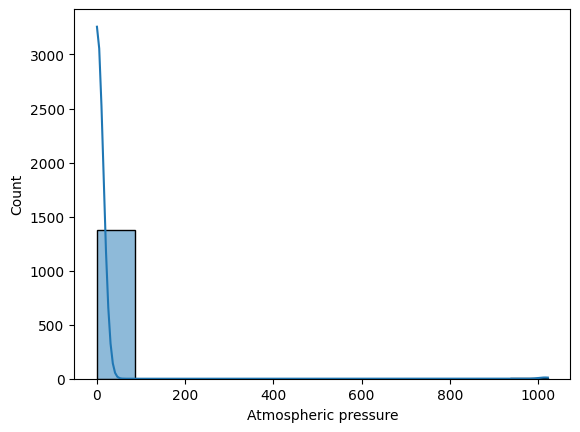

In [6]:
sns.histplot(data=df, x= 'Atmospheric pressure', kde=True)

In [7]:
df['Atmospheric pressure'].value_counts()

Atmospheric pressure
0.0       1377
1015.7       1
1013.2       1
1010.5       1
1022.0       1
1017.5       1
Name: count, dtype: int64

<Axes: xlabel='Average visibility', ylabel='count'>

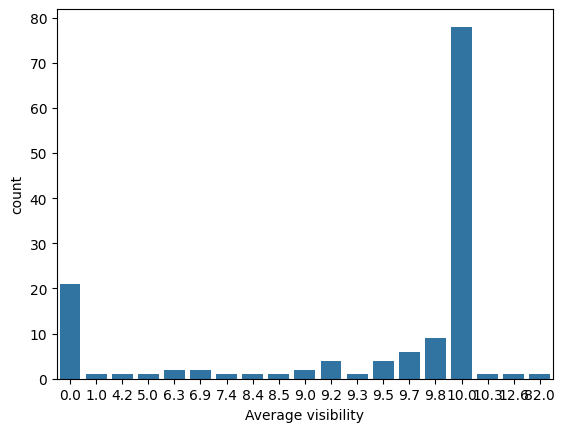

In [8]:
sampled_df = df.sample(frac=0.1, random_state=42)
sns.countplot(data=sampled_df, x='Average visibility')

In [9]:
bin_edges = range(0, int(df['Average visibility'].max()) + 20, 20)
binned_data = pd.cut(df['Average visibility'], bins=bin_edges)
value_counts = binned_data.value_counts().sort_index()
print(value_counts)

Average visibility
(0, 20]       1078
(20, 40]         0
(40, 60]        17
(60, 80]         0
(80, 100]        8
(100, 120]       1
(120, 140]       0
(140, 160]       0
(160, 180]       0
(180, 200]       0
(200, 220]       0
(220, 240]       0
(240, 260]       0
(260, 280]       0
(280, 300]       0
(300, 320]       0
(320, 340]       0
(340, 360]       0
(360, 380]       0
(380, 400]       0
(400, 420]       0
(420, 440]       0
(440, 460]       0
(460, 480]       0
(480, 500]       0
(500, 520]       1
Name: count, dtype: int64


In [10]:
df.columns

Index(['Average Outflow', 'Average Inflow', 'Energy Consumption', 'Ammonia',
       'Biological Oxygen Demand', 'Chemical Oxygen Demand', 'Total Nitrogen',
       'Average Temperature', 'Maximum temperature', 'Minimum temperature',
       'Atmospheric pressure', 'Average humidity', 'Total rainfall',
       'Average visibility', 'Average wind speed', 'Maximum wind speed',
       'Year', 'Month', 'Day'],
      dtype='object')

In [11]:
correlation = df[df.columns].corr()
correlation

Average Outflow  Average Inflow  Energy Consumption  \
Average Outflow                  1.000000        0.541923            0.167099   
Average Inflow                   0.541923        1.000000            0.136211   
Energy Consumption               0.167099        0.136211            1.000000   
Ammonia                          0.040590       -0.032709           -0.133076   
Biological Oxygen Demand        -0.115811       -0.121364           -0.136945   
Chemical Oxygen Demand          -0.022723        0.018026            0.000346   
Total Nitrogen                  -0.061951       -0.035827           -0.167448   
Average Temperature             -0.000163        0.098149           -0.266053   
Maximum temperature              0.006070        0.093073           -0.245119   
Minimum temperature              0.035516        0.140905           -0.222896   
Atmospheric pressure            -0.068941       -0.012452           -0.004160   
Average humidity                -0.016560       -0.040534            0.155245   
Total rainfall                  -0.090001       -0.100358           -0.014242   
Average visibility              -0.027635       -0.031872            0.007085   
Average wind speed              -0.015406       -0.025010            0.020656   
Maximum wind speed              -0.006319       -0.012203            0.017388   
Year                             0.308915        0.388505            0.179876   
Month                           -0.012221       -0.066273            0.272076   
Day                             -0.061292       -0.055009            0.023010   

                           Ammonia  Biological Oxygen Demand  \
Average Outflow           0.040590                 -0.115811   
Average Inflow           -0.032709                 -0.121364   
Energy Consumption       -0.133076                 -0.136945   
Ammonia                   1.000000                  0.164753   
Biological Oxygen Demand  0.164753                  1.000000   
Chemical Oxygen Demand    0.284552                  0.524189   
Total Nitrogen            0.342995                  0.455843   
Average Temperature       0.110000                  0.150706   
Maximum temperature       0.099279                  0.137368   
Minimum temperature       0.094802                  0.133025   
Atmospheric pressure     -0.032908                 -0.011270   
Average humidity         -0.076970                 -0.087240   
Total rainfall           -0.074313                  0.001186   
Average visibility       -0.028647                 -0.019039   
Average wind speed       -0.047966                  0.001384   
Maximum wind speed       -0.048622                  0.000370   
Year                      0.140567                 -0.228753   
Month                    -0.112396                 -0.065866   
Day                      -0.029223                 -0.000713   

                          Chemical Oxygen Demand  Total Nitrogen  \
Average Outflow                        -0.022723       -0.061951   
Average Inflow                          0.018026       -0.035827   
Energy Consumption                      0.000346       -0.167448   
Ammonia                                 0.284552        0.342995   
Biological Oxygen Demand                0.524189        0.455843   
Chemical Oxygen Demand                  1.000000        0.681225   
Total Nitrogen                          0.681225        1.000000   
Average Temperature                     0.083946        0.269751   
Maximum temperature                     0.090018        0.259386   
Minimum temperature                     0.052716        0.232274   
Atmospheric pressure                    0.002585        0.006595   
Average humidity                       -0.152655       -0.210108   
Total rainfall                         -0.055335       -0.012618   
Average visibility                     -0.050351       -0.053080   
Average wind speed                     -0.029496       -0.029228   
Maximum wind speed                  

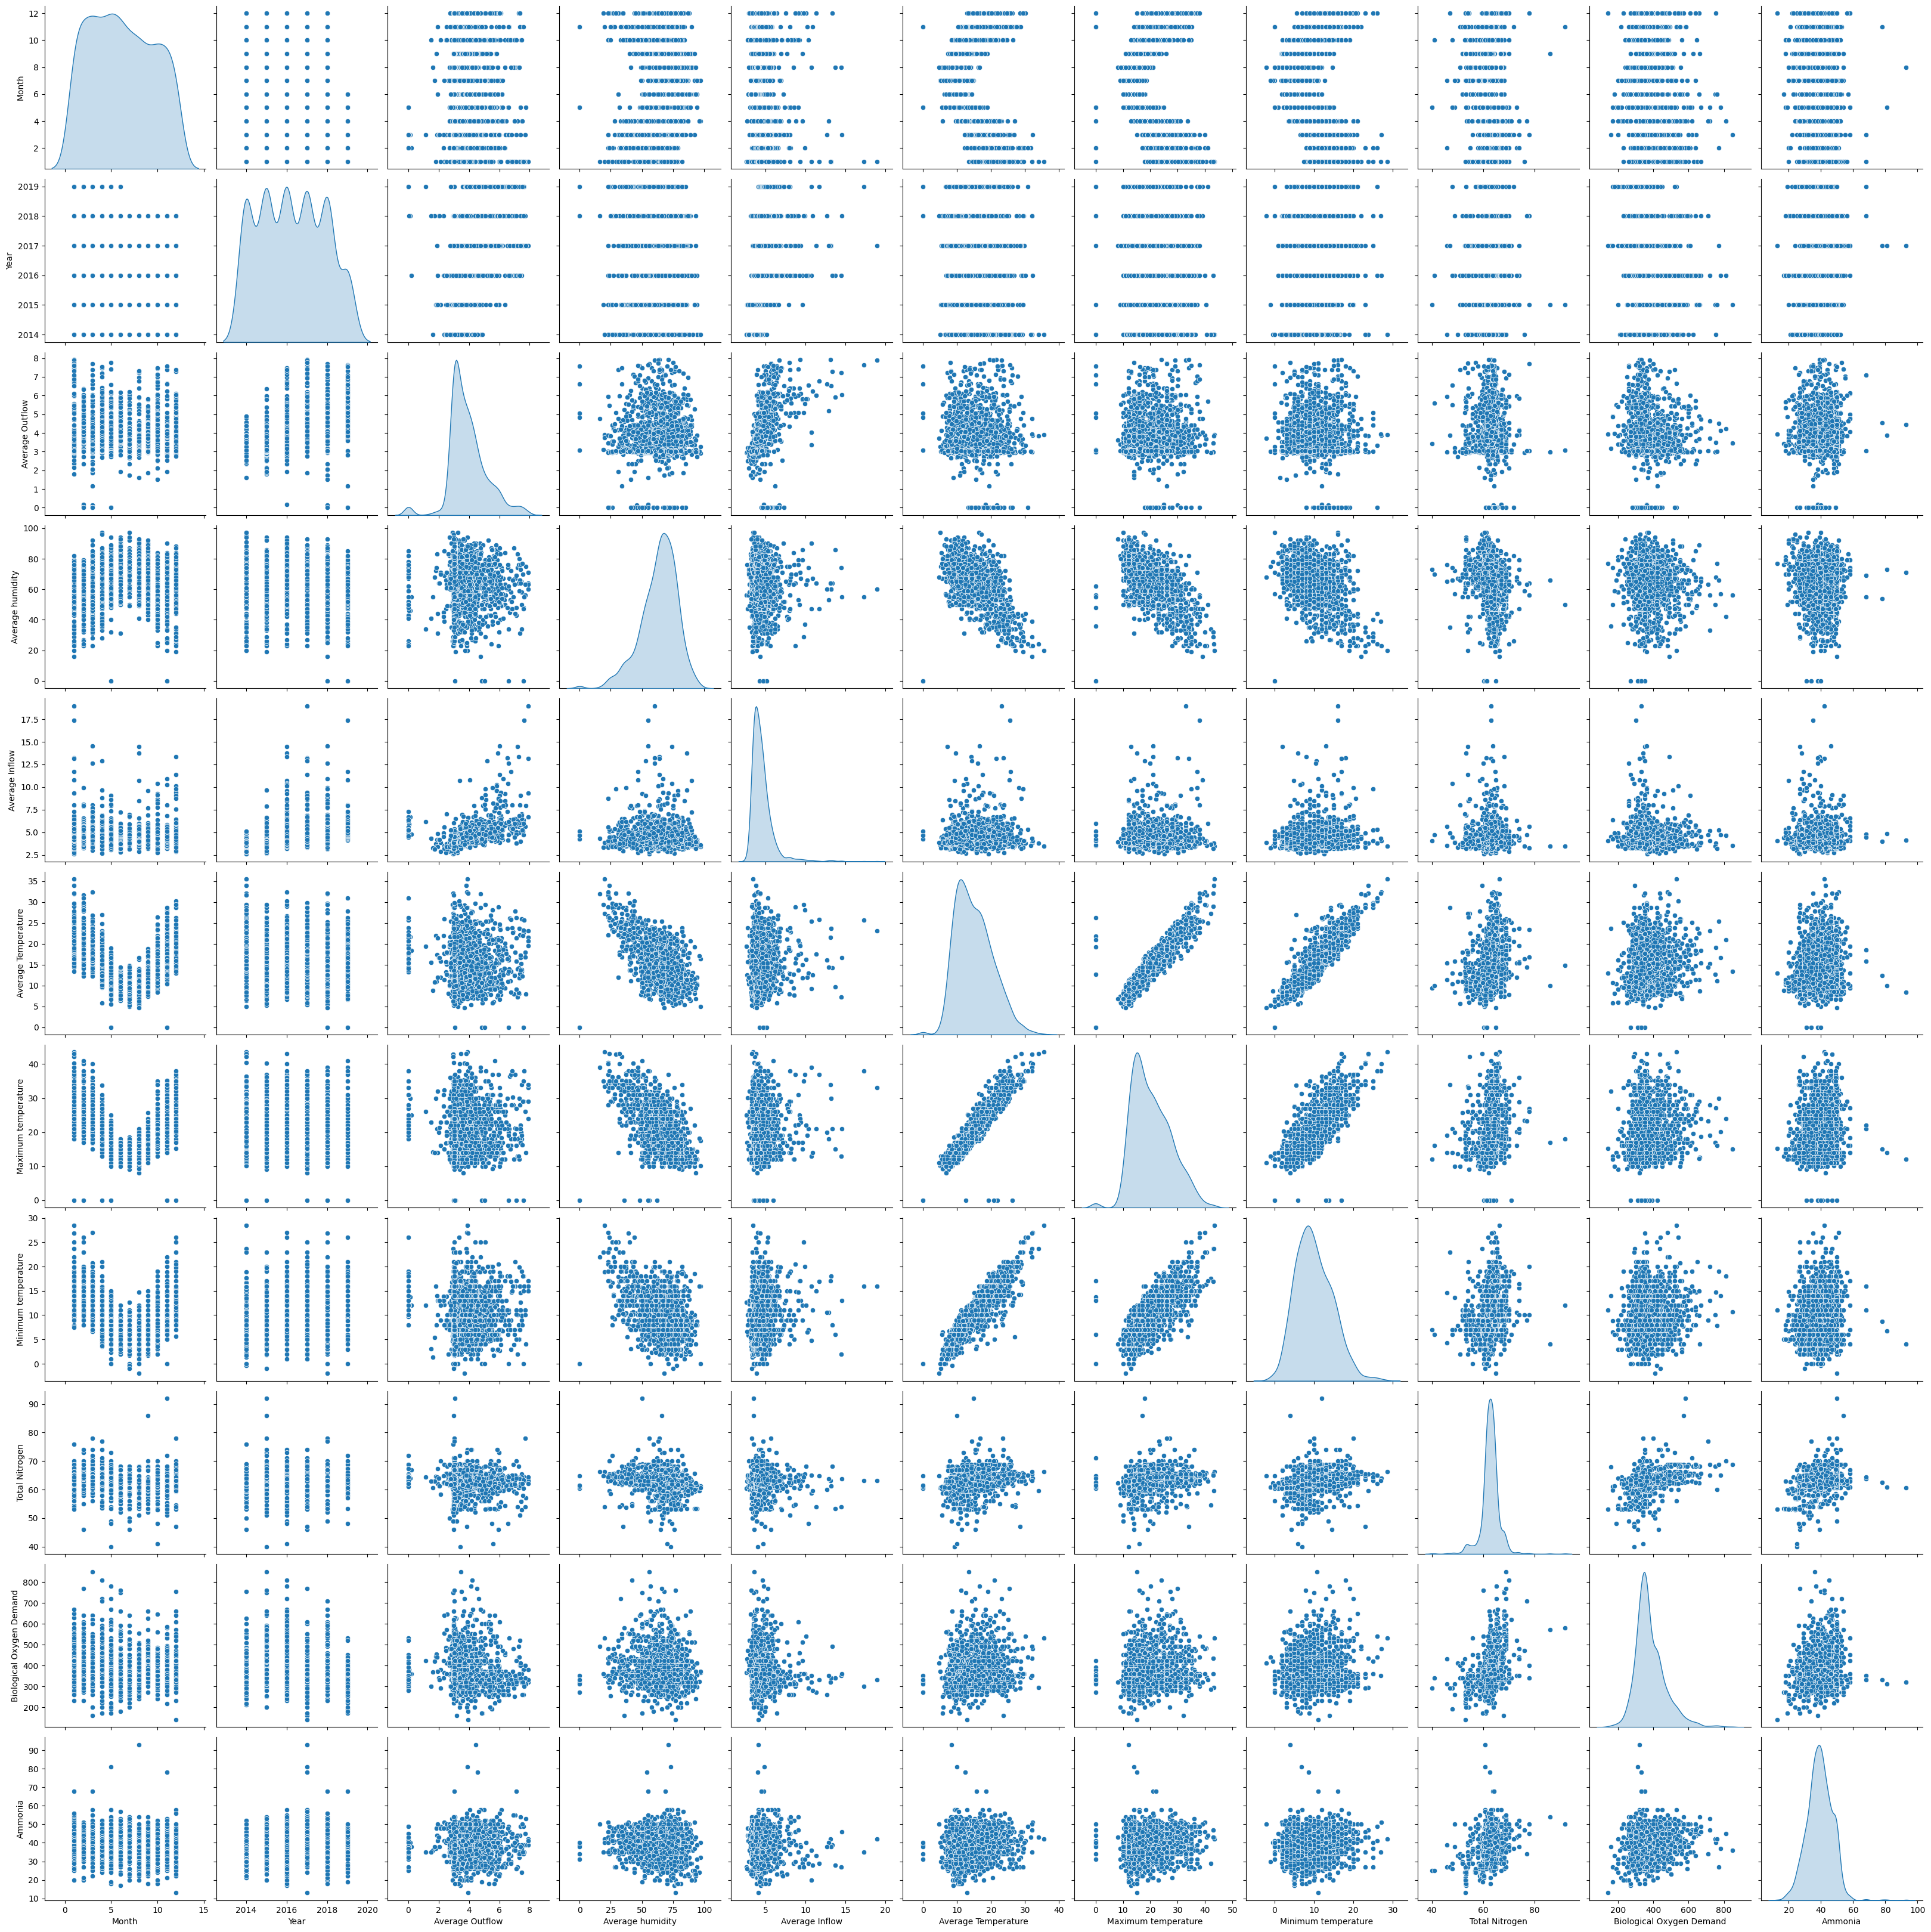

In [12]:
sns.pairplot(df[["Month", "Year", "Average Outflow", "Average humidity", "Average Inflow", "Average Temperature", "Maximum temperature", "Minimum temperature", "Total Nitrogen", "Biological Oxygen Demand", "Ammonia"]], kind="scatter", 
    diag_kind="kde", 
    height=3
)
plt.show()



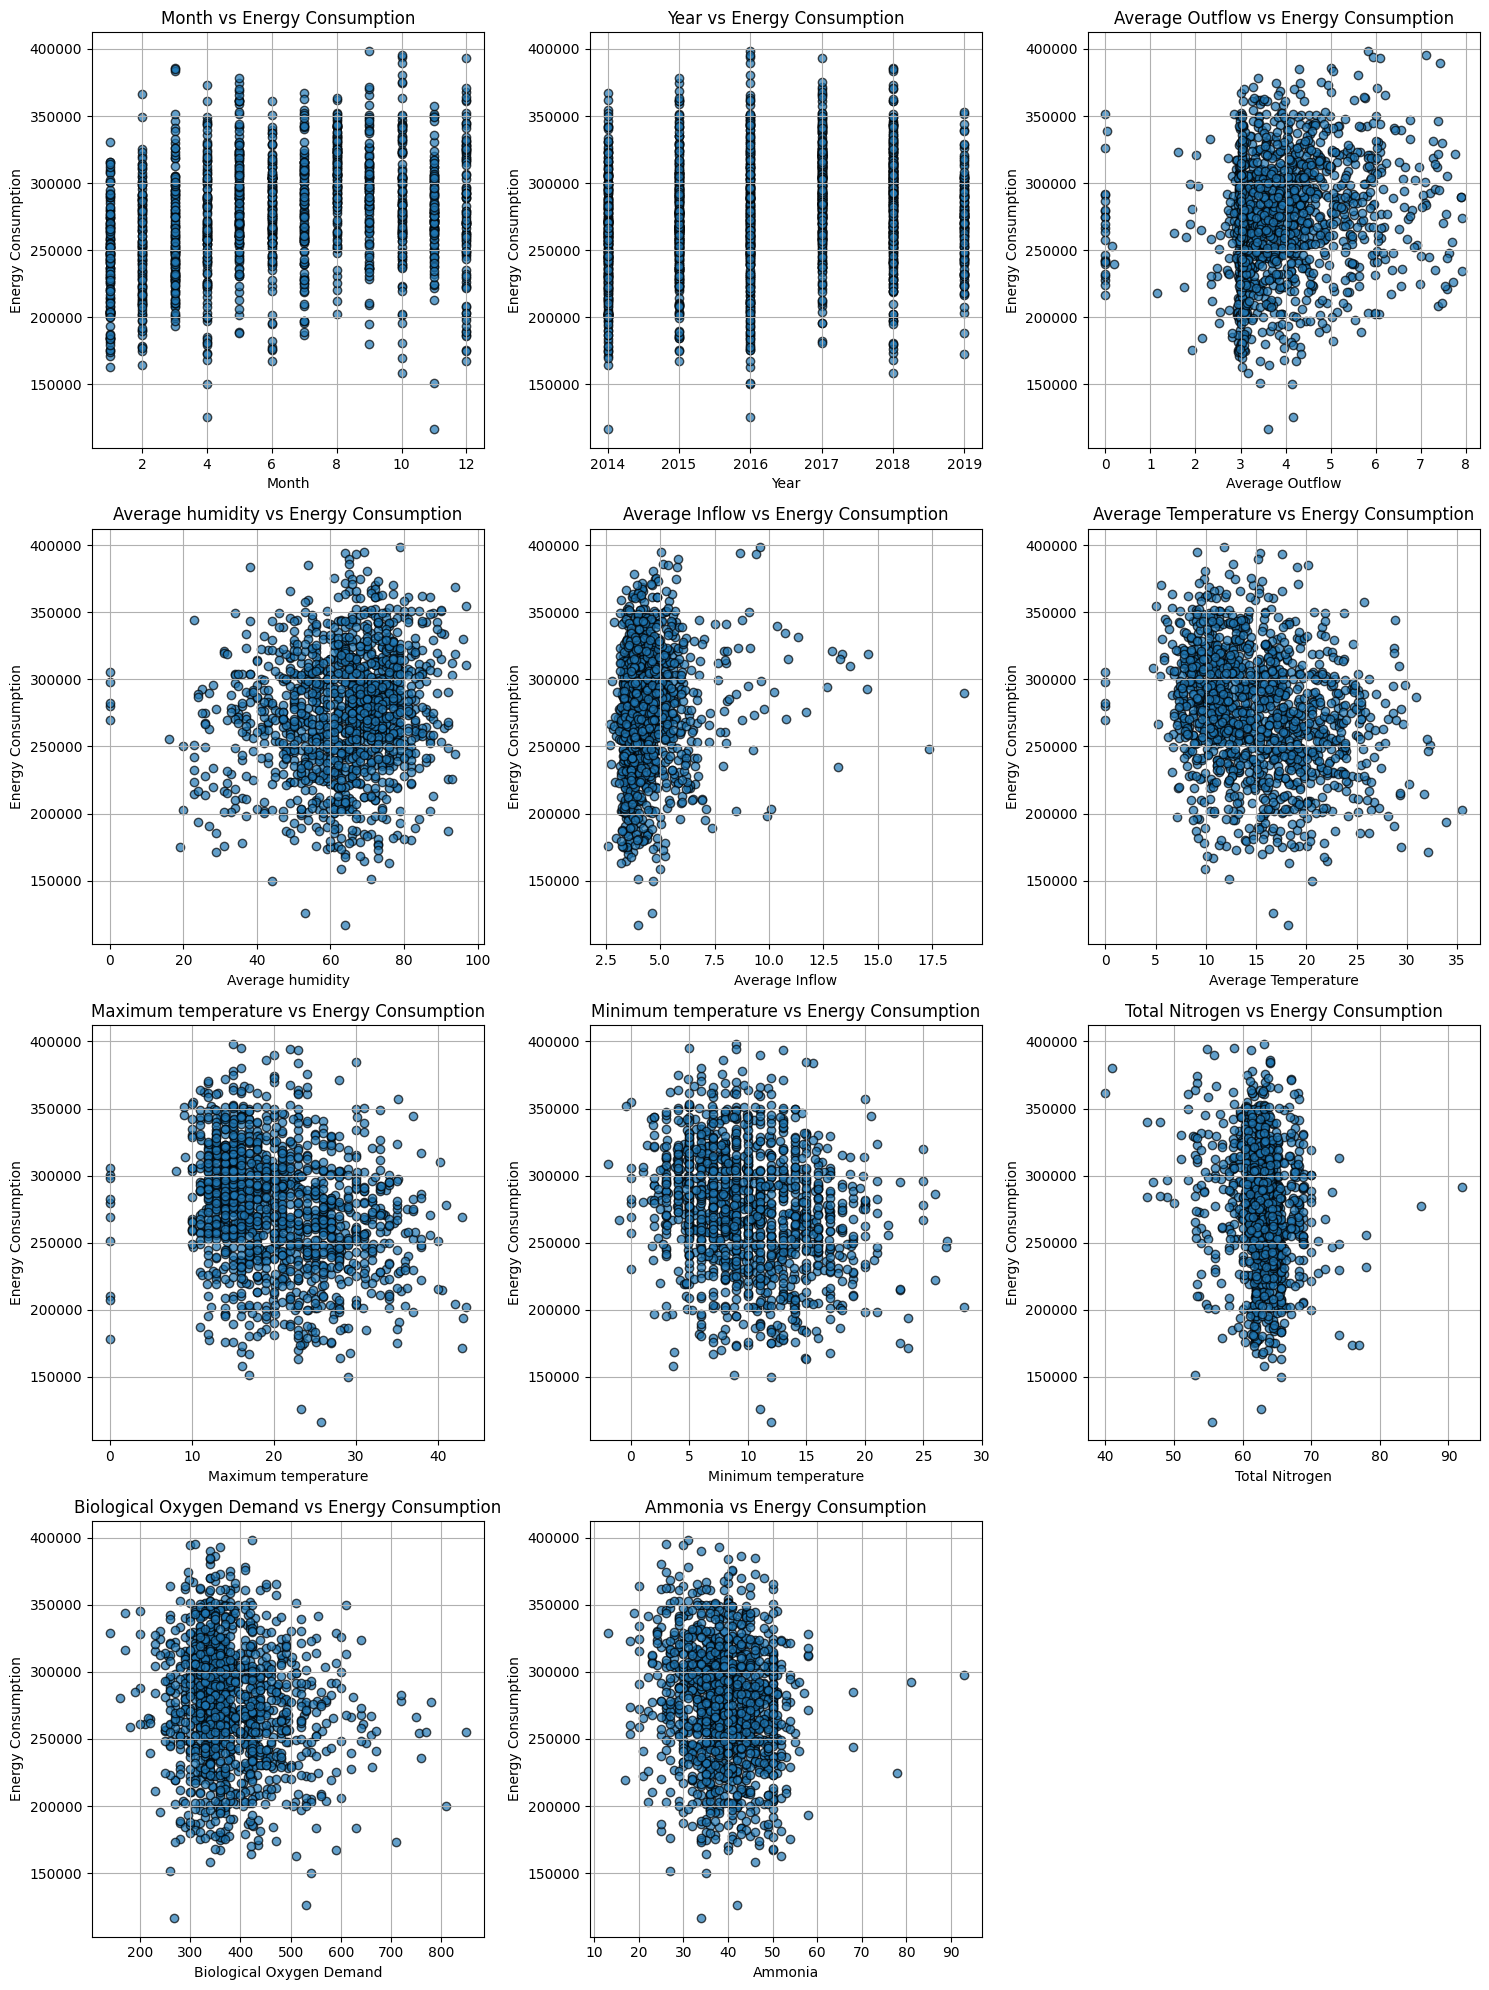

In [13]:
target = "Energy Consumption"
features = ["Month", "Year", "Average Outflow", "Average humidity", 
    "Average Inflow", "Average Temperature", "Maximum temperature", 
    "Minimum temperature", "Total Nitrogen", "Biological Oxygen Demand", "Ammonia"
]
plots_per_row = 3
n_rows = -(-len(features) // plots_per_row)
fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(15, n_rows * 5))
axes = axes.flatten() 
for i, column in enumerate(features):
    ax = axes[i]
    ax.scatter(df[column], df[target], alpha=0.7, edgecolors="k")
    ax.set_title(f"{column} vs {target}")
    ax.set_xlabel(column)
    ax.set_ylabel(target)
    ax.grid(True)
for j in range(len(features), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

logistic regression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
target = "Energy Consumption"
features = ["Year", "Month", "Average humidity", "Average Outflow", "Average Temperature", "Total Nitrogen", "Biological Oxygen Demand", "Ammonia"]
df['Operational_State'] = (df[target] > df[target].mean()).astype(int)
print(df['Operational_State'])
X = df[features]
y = df['Operational_State']

0       0
1       0
2       0
3       0
4       0
       ..
1377    1
1378    1
1379    1
1380    1
1381    1
Name: Operational_State, Length: 1382, dtype: int64


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [16]:

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.69

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.68      0.68       133
           1       0.70      0.69      0.69       144

    accuracy                           0.69       277
   macro avg       0.69      0.69      0.69       277
weighted avg       0.69      0.69      0.69       277


Confusion Matrix:
 [[91 42]
 [45 99]]


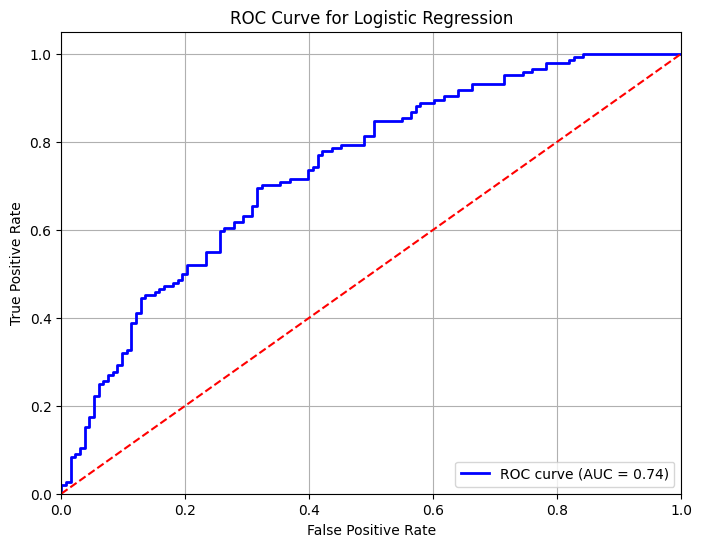

In [20]:
from sklearn.metrics import roc_curve, auc
if len(np.unique(y)) == 2:
    y_score = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Logistic Regression')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


KNN algo

Best parameters found: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Mean Squared Error: 0.19209909343783255
Root Mean Squared Error: 0.4382911058164796
R2 Score: 0.23038996760696273
Accuracy: 0.7148014440433214
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       133
           1       0.72      0.73      0.73       144

    accuracy                           0.71       277
   macro avg       0.71      0.71      0.71       277
weighted avg       0.71      0.71      0.71       277



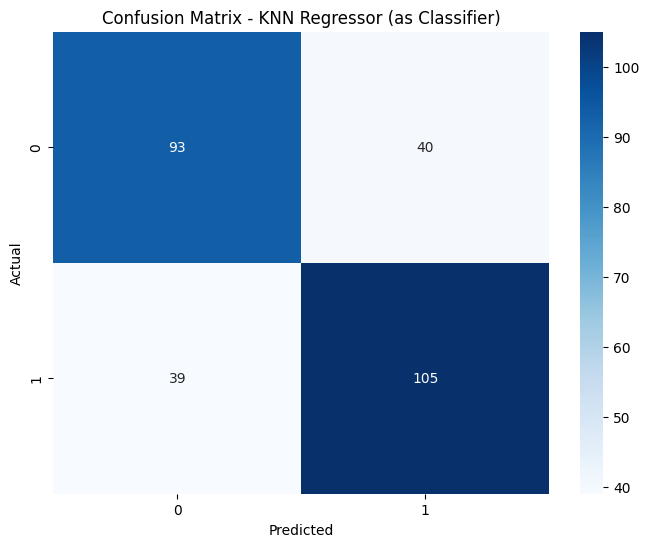

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")
knn_temp = grid_search.best_estimator_
y_pred_regresn = knn_temp.predict(X_test_scaled)
y_pred_class = np.round(y_pred_regresn) 

mse = mean_squared_error(y_test, y_pred_regresn)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred_regresn)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

conf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN Regressor (as Classifier)")
plt.show()


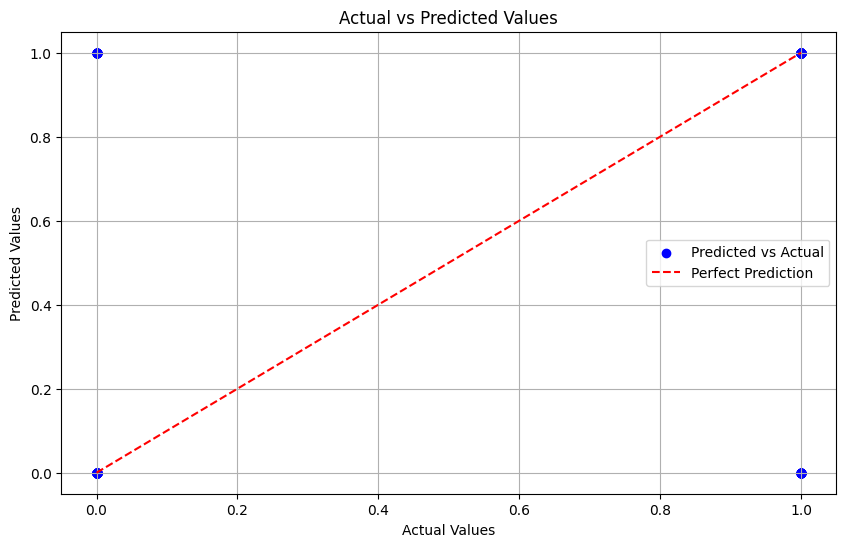

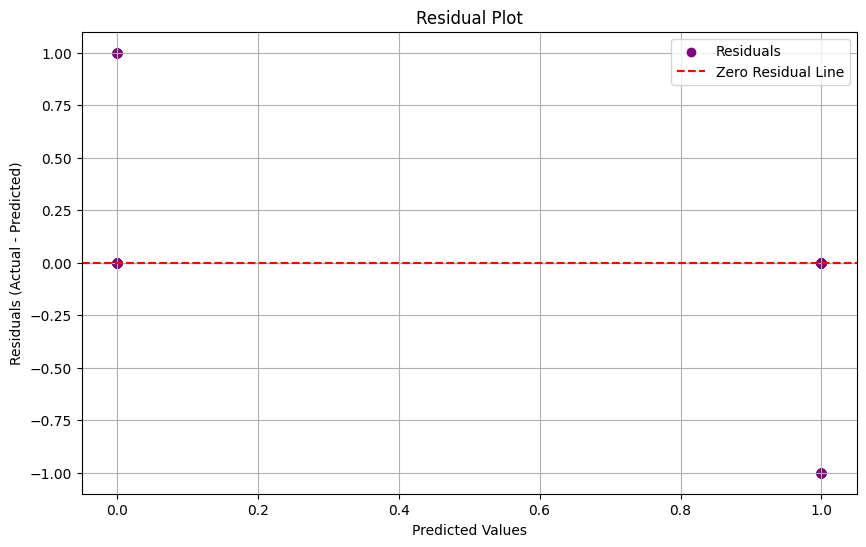

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

requiring = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, requiring, color='purple', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.legend()
plt.grid(True)
plt.show()

Decision Tree Classifier

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.64
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.67      0.64       133
           1       0.67      0.61      0.64       144

    accuracy                           0.64       277
   macro avg       0.64      0.64      0.64       277
weighted avg       0.64      0.64      0.64       277



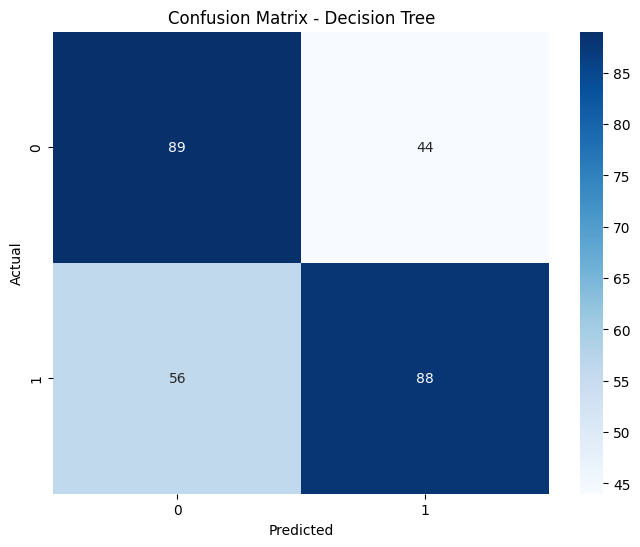

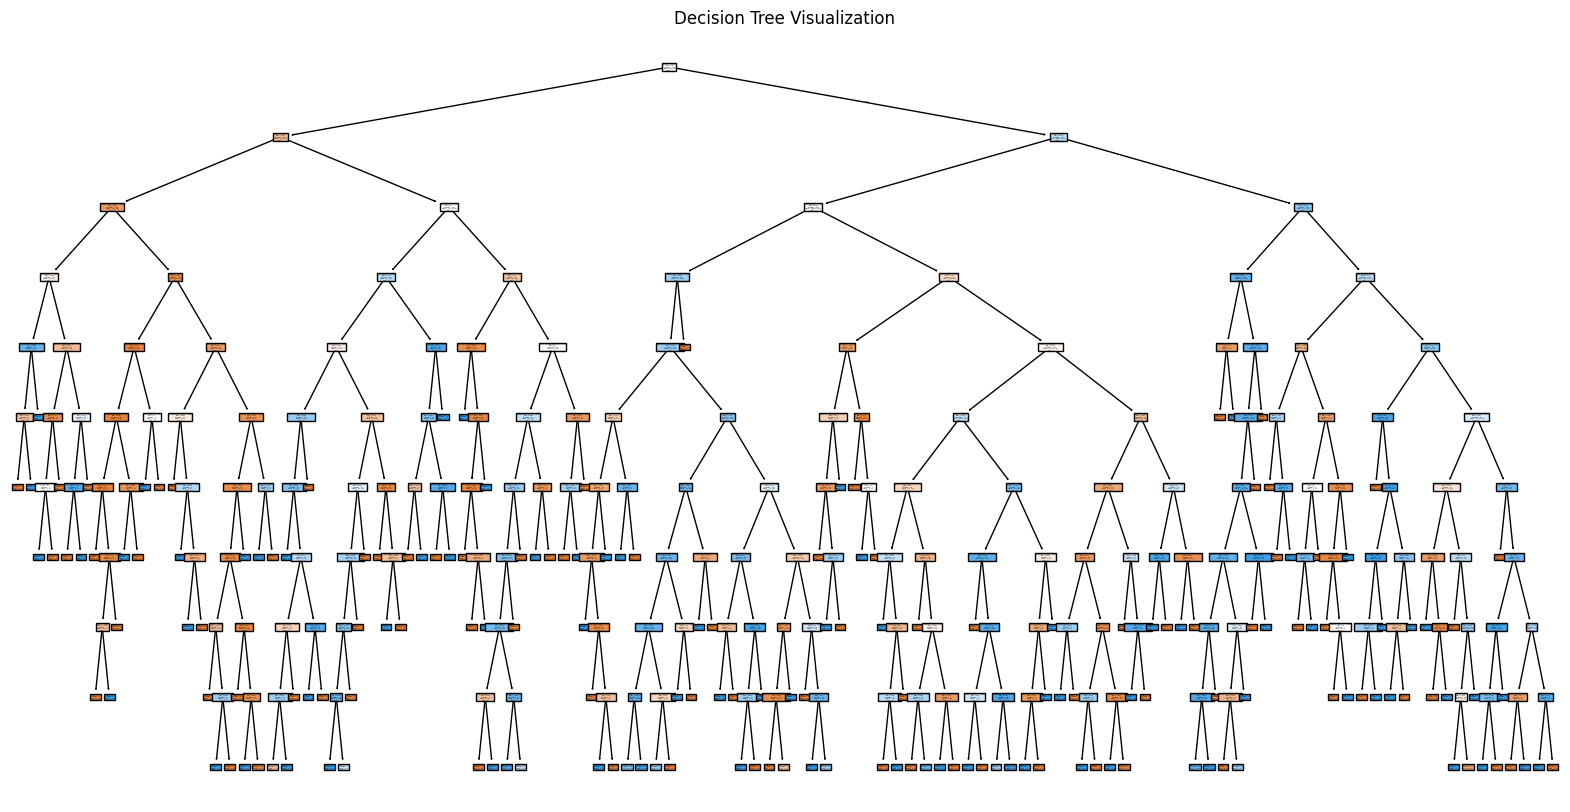

In [23]:
from sklearn.tree import plot_tree
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
dt_best = grid_search.best_estimator_
y_pred = dt_best.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=dt_best.classes_, yticklabels=dt_best.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# STEP 8: Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_best, feature_names=X.columns, class_names=[str(cls) for cls in dt_best.classes_], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


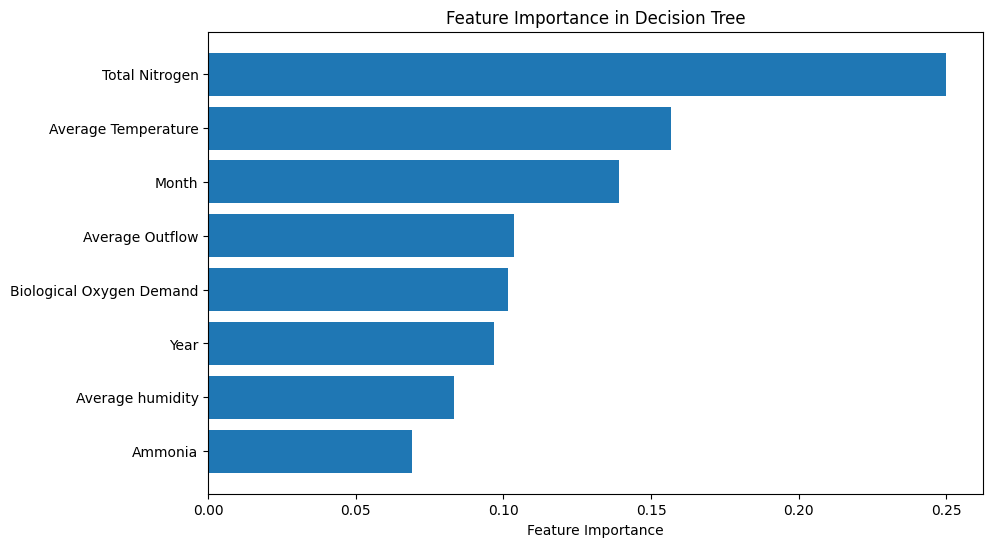

In [24]:
importantfeat = dt_best.feature_importances_
feature_names = X.columns
sorted_indices = importantfeat.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), importantfeat[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree')
plt.show()


In [25]:
dt_weighted = DecisionTreeClassifier(random_state=42, class_weight='balanced', **best_params)
dt_weighted.fit(X_train_scaled, y_train)

y_pred_weighted = dt_weighted.predict(X_test_scaled)
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print(f"Weighted Accuracy: {accuracy_weighted:.2f}")
print("Classification Report (Weighted):")
print(classification_report(y_test, y_pred_weighted))


Weighted Accuracy: 0.65
Classification Report (Weighted):
              precision    recall  f1-score   support

           0       0.63      0.66      0.64       133
           1       0.67      0.64      0.65       144

    accuracy                           0.65       277
   macro avg       0.65      0.65      0.65       277
weighted avg       0.65      0.65      0.65       277



Random forest classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.70
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.67      0.74      0.71       133
           1       0.74      0.67      0.70       144

    accuracy                           0.70       277
   macro avg       0.71      0.71      0.70       277
weighted avg       0.71      0.70      0.70       277



Best parameters for SVM: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 4, 'C': 1}
SVM Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.58      0.62       199
           1       0.65      0.72      0.69       216

    accuracy                           0.66       415
   macro avg       0.66      0.65      0.65       415
weighted avg       0.66      0.66      0.65       415



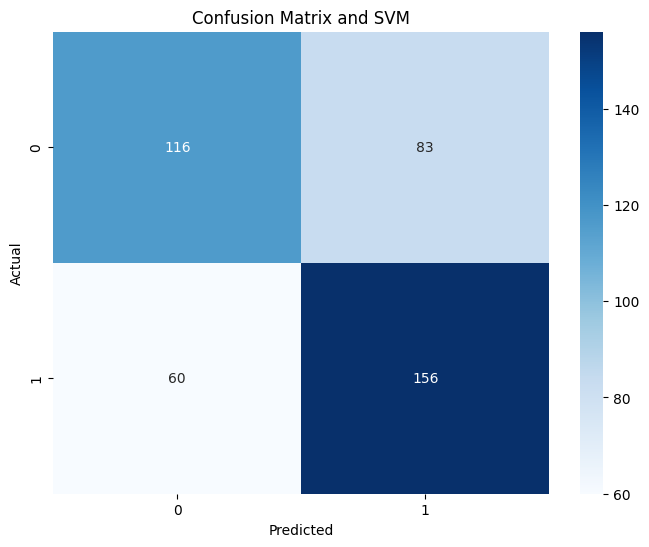

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Feature matrix (X) and target variable (y)
X = df[["Average Outflow", "Average Temperature", "Total Nitrogen", "Biological Oxygen Demand"]]
y = df['Operational_State']  # Replace with your target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define SVM model
svm = SVC(random_state=42)

# Define hyperparameter space
param_dist = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'degree': [3, 4, 5]  # Only relevant for the 'poly' kernel
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=svm,
    param_distributions=param_dist,
    n_iter=20,  # Test 20 random combinations
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train_scaled, y_train)

# Best hyperparameters
best_params = random_search.best_params_
print(f"Best parameters for SVM: {best_params}")

# Train the best SVM model
svm_best = random_search.best_estimator_

# Make predictions on the test set
y_pred = svm_best.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=svm_best.classes_, yticklabels=svm_best.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix and SVM")
plt.show()


best model as per my feature extraction is KNN model with
Mean Squared Error: 0.19209909343783255
Root Mean Squared Error: 0.4382911058164796
R2 Score: 0.23038996760696273
Accuracy: 0.7148014440433214
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       133
           1       0.72      0.73      0.73       144

    accuracy                           0.71       277
   macro avg       0.71      0.71      0.71       277
weighted avg       0.71      0.71      0.71       277